In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tallant.utils.explorer import quick_summary

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

In [14]:
run make_mushrooms.py

In [19]:
quick_summary(df)

,% Missing,Type,Uniques,Example
Feature,,,,
edible,0,Binary,2,poisonous
cap_shape,0,Categorical,6,convex
cap_surface,0,Categorical,4,smooth
cap_color,0,Categorical,10,brown
bruises,0,Binary,2,bruises
odor,0,Categorical,9,pungent
gill_attachment,0,Binary,2,free
gill_spacing,0,Binary,2,close
gill_size,0,Binary,2,narrow


In [25]:
df.stalk_root.value_counts(dropna=False)

bulbous    3776
NaN        2480
equal      1120
club        556
rooted      192
Name: stalk_root, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('edible', axis=1), 
                                                    df['edible'], 
                                                    test_size=0.33, 
                                                    random_state=42)

In [33]:
wide_x = pd.get_dummies(X_train, drop_first=True)

In [34]:
quick_summary(wide_x)

,% Missing,Type,Uniques,Example
Feature,,,,
cap_shape_conical,0,Binary,2,0
cap_shape_convex,0,Binary,2,0
cap_shape_flat,0,Binary,2,1
cap_shape_knobbed,0,Binary,2,0
cap_shape_sunken,0,Binary,2,0
cap_surface_grooves,0,Binary,2,0
cap_surface_scaly,0,Binary,2,0
cap_surface_smooth,0,Binary,2,0
cap_color_buff,0,Binary,2,0


# Filter Methods

## Grab the best K features based on statistical test

In [58]:
selector = SelectKBest(score_func=chi2, k=8).fit(wide_x, y_train)
wide_x[wide_x.columns[selector.get_support()]].head()

,odor_foul,odor_none,gill_size_narrow,gill_color_buff,stalk_surface_above_ring_silky,stalk_surface_below_ring_silky,ring_type_large,spore_print_color_chocolate
3244,0,1,0,0,0,0,0,0
3739,0,0,1,0,0,0,0,0
2154,0,1,0,0,0,0,0,0
1344,0,1,0,0,0,0,0,0
7852,0,0,1,1,0,1,0,0


## Remove features with low variance
Remove all features that are either one or zero (on or off) in more than 80% of the samples. What could be wrong with this approach for this task?

In [57]:
selector = VarianceThreshold(threshold=(.8 * (1 - .8))).fit(wide_x)
wide_x[wide_x.columns[selector.get_support()]].head()

,cap_shape_convex,cap_shape_flat,cap_surface_scaly,cap_surface_smooth,cap_color_gray,bruises_no,odor_foul,odor_none,gill_size_narrow,gill_color_buff,...,stalk_color_above_ring_pink,stalk_color_above_ring_white,stalk_color_below_ring_pink,stalk_color_below_ring_white,ring_type_pendant,spore_print_color_brown,spore_print_color_white,population_several,population_solitary,habitat_woods
3244,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,1
3739,1,0,0,0,1,1,0,0,1,0,...,0,1,0,1,1,0,0,1,0,1
2154,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,1,1
1344,0,1,0,1,0,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
7852,0,0,1,0,0,1,0,0,1,1,...,0,1,0,1,0,0,1,1,0,0


## Select only the most important features by information gain

In [81]:
tree = DecisionTreeClassifier().fit(wide_x, y_train)


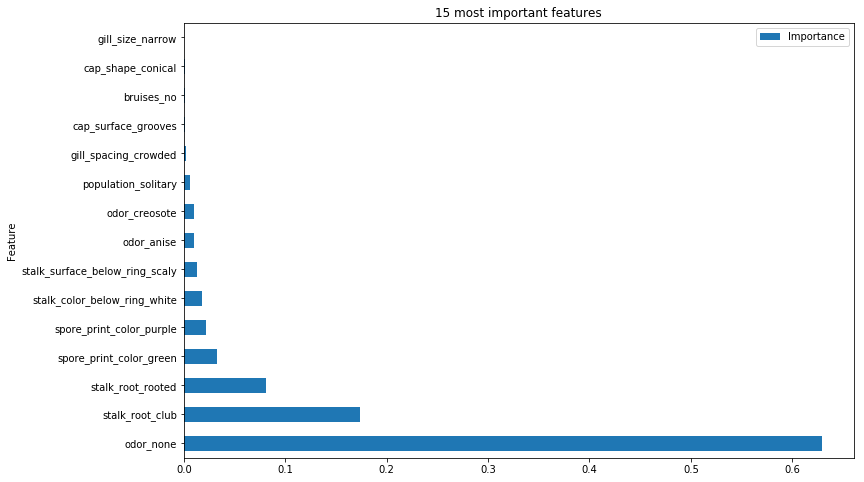

In [108]:
(pd.DataFrame(list(zip(wide_x.columns, tree.feature_importances_)),
             columns=['Feature', 'Importance'])
 .sort_values('Importance', ascending=False)
 .set_index('Feature')
 .head(15)
 .plot(kind='barh', figsize=(12,8)))
plt.title('15 most important features')
plt.show()

# Wrapper Method

## Recursive Feature Elimination

In [112]:
selector = RFE(DecisionTreeClassifier(), 8, step=1).fit(wide_x, y_train)

In [113]:
wide_x[wide_x.columns[selector.get_support()]].head()

,bruises_no,odor_anise,odor_none,gill_size_narrow,stalk_root_club,stalk_surface_below_ring_scaly,spore_print_color_green,spore_print_color_purple
3244,0,0,1,0,0,0,0,0
3739,1,0,0,1,0,0,0,0
2154,0,0,1,0,0,0,0,0
1344,1,0,1,0,0,0,0,0
7852,1,0,0,1,0,0,0,0


# Embedded Method
Ridge Reg